In [1]:
# Hi this is Ankit Rajput. For this project I will be analyzing some 911 call data from Kaggle
# This project includes Exploratory data Analysis and Data Visualization


In [2]:
# Importing Reqired libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [32]:
# Reading Data into python dataframe

df = pd.read_csv('911.csv')
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [33]:
# Column names

df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [4]:
# top 5 zipcodes for 911 calls

df['zip'].value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [5]:
# top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [6]:
# Taking a look at the 'title' column, to see how many unique title codes are there

df['title'].nunique()


110

In [7]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
# We will create a new column called "Reason" that contains this string value.

df['reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['reason'].head()


0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [8]:
#  most common Reason for a 911 call

df['reason'].value_counts()


EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<Axes: xlabel='reason', ylabel='count'>

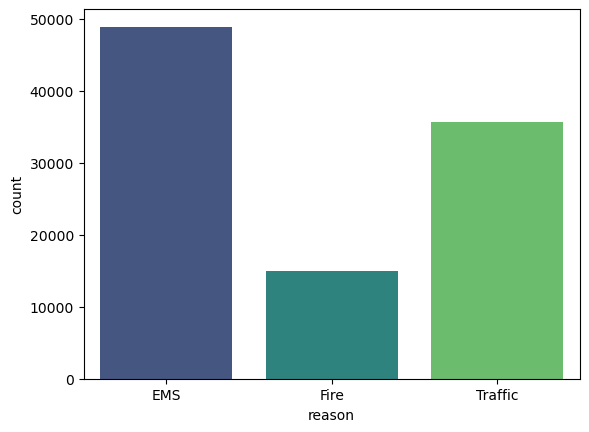

In [9]:
# Using seaborn to create a countplot of 911 calls by Reason

sns.countplot(x='reason',data=df,palette='viridis')


In [10]:
# Checking the data type of the objects in the timeStamp column

type(df['timeStamp'].iloc[0])


str

In [11]:
# These timestamps are still "strings". We will use "pd.to_datetime" to convert the column from "strings" to "DateTime" objects.

df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [12]:
# Using ".apply()" to create 3 new columns called hour, month, and dayofweek
# We will create these columns based off of the timeStamp column

df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df[['hour','month','dayofweek']].head()


,hour,month,dayofweek
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3


In [13]:
# Day of Week is an integer 0-6.
# We will use the ".map()" method to map the actual string names to the day of the week i.e. 0 = Mon, 1 = Tue and so on

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

df[['hour','month','dayofweek']].head()


,hour,month,dayofweek
0,17,12,Thu
1,17,12,Thu
2,17,12,Thu
3,17,12,Thu
4,17,12,Thu


<Axes: xlabel='month', ylabel='count'>

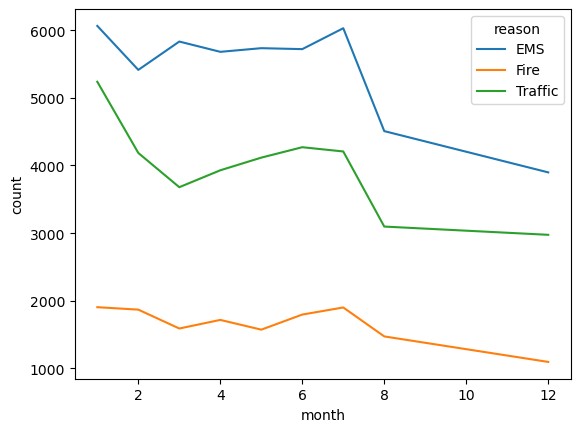

In [14]:
# Creating a new dataframe with count of occurrences of each reason per month
count_df = df.groupby(['month', 'reason']).size().reset_index(name='count')
count_df

# Plot the line plot with count of occurrences of each reason per month
sns.lineplot(x='month', y='count', hue='reason', data=count_df)


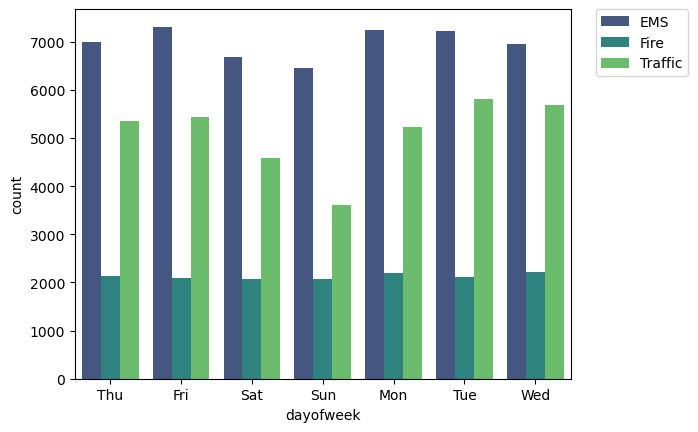

In [15]:
# Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column
sns.countplot(x='dayofweek',data=df,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


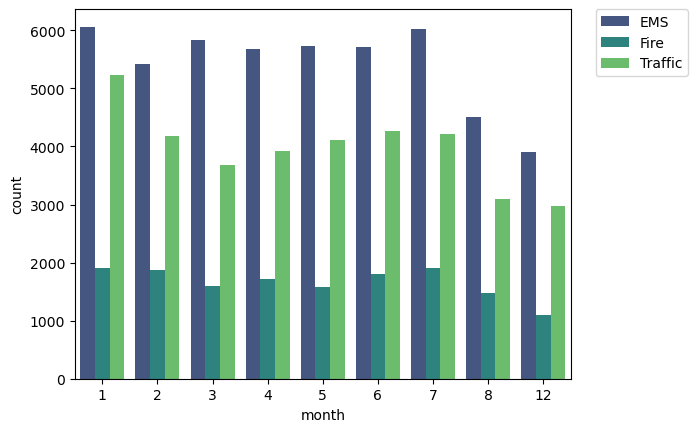

In [16]:
# Now do the same for Month:
sns.countplot(x='month',data=df,hue='reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [17]:
# The data we fetched is missing some months, 9,10, and 11 are not there.
# We can maybe fill in this information by plotting the information in another way-
# possibly a simple line plot that fills in the missing months
# We will create a new dataframe off of original dataframe

byMonth = df.groupby('month').count()
byMonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<Axes: xlabel='month'>

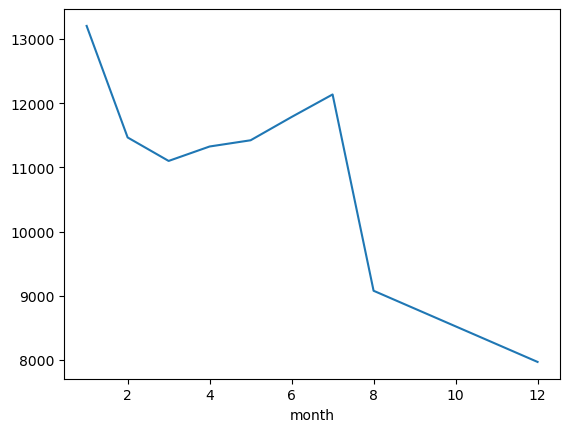

In [18]:
# Creating a simple plot off of the dataframe indicating the count of calls per month. 
# We can use any column to plot 

byMonth['lat'].plot() 


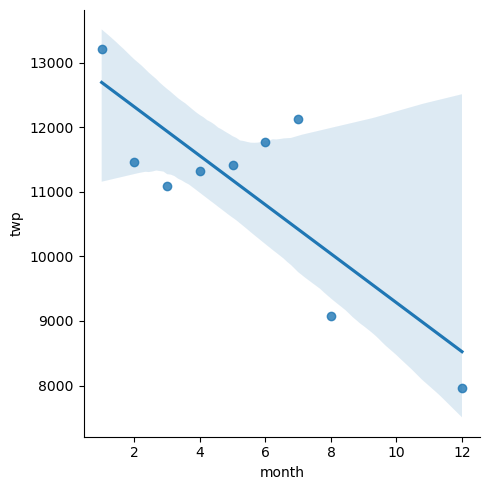

In [19]:
# Using seaborn's lmplot() to create a linear fit on the number of calls per month

sns.lmplot(x='month', y='twp', data=byMonth.reset_index())


In [20]:
# Creating a new column called 'Date' that contains the date from the timeStamp column.

df['date'] = df['timeStamp'].apply(lambda t:t.date())


Text(0.5, 1.0, 'Counts of 911 calls')

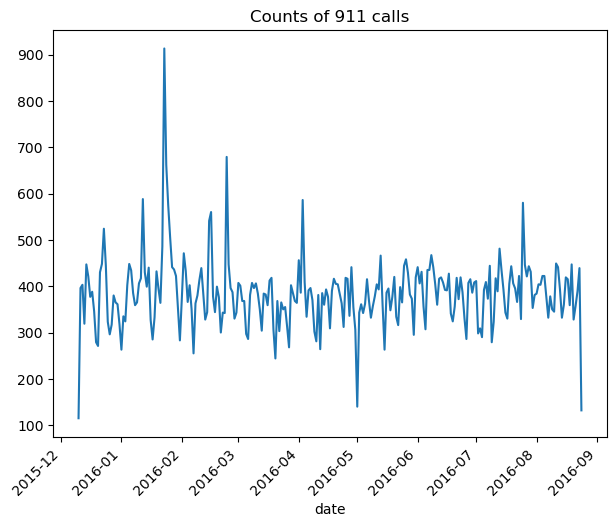

In [21]:
# Now perforing groupby on "Date" column with the count() aggregate to create a plot of counts of 911 calls.

df.groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.title('Counts of 911 calls')


(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(16770.0, 0, '2015-12'),
  Text(16801.0, 0, '2016-01'),
  Text(16832.0, 0, '2016-02'),
  Text(16861.0, 0, '2016-03'),
  Text(16892.0, 0, '2016-04'),
  Text(16922.0, 0, '2016-05'),
  Text(16953.0, 0, '2016-06'),
  Text(16983.0, 0, '2016-07'),
  Text(17014.0, 0, '2016-08'),
  Text(17045.0, 0, '2016-09')])

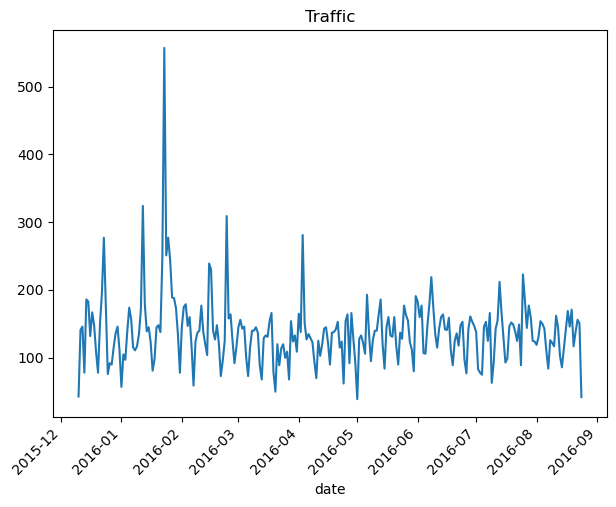

In [22]:
# Creating 3 separate plots with each plot representing a Reason for the 911 call

df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')


(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(16770.0, 0, '2015-12'),
  Text(16801.0, 0, '2016-01'),
  Text(16832.0, 0, '2016-02'),
  Text(16861.0, 0, '2016-03'),
  Text(16892.0, 0, '2016-04'),
  Text(16922.0, 0, '2016-05'),
  Text(16953.0, 0, '2016-06'),
  Text(16983.0, 0, '2016-07'),
  Text(17014.0, 0, '2016-08'),
  Text(17045.0, 0, '2016-09')])

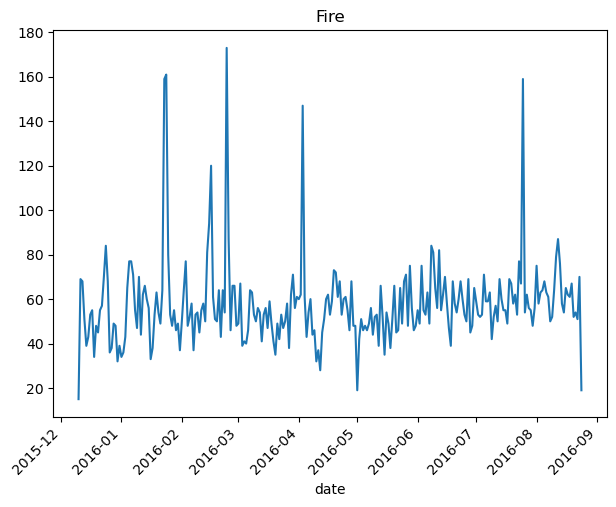

In [23]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')


(array([16770., 16801., 16832., 16861., 16892., 16922., 16953., 16983.,
        17014., 17045.]),
 [Text(16770.0, 0, '2015-12'),
  Text(16801.0, 0, '2016-01'),
  Text(16832.0, 0, '2016-02'),
  Text(16861.0, 0, '2016-03'),
  Text(16892.0, 0, '2016-04'),
  Text(16922.0, 0, '2016-05'),
  Text(16953.0, 0, '2016-06'),
  Text(16983.0, 0, '2016-07'),
  Text(17014.0, 0, '2016-08'),
  Text(17045.0, 0, '2016-09')])

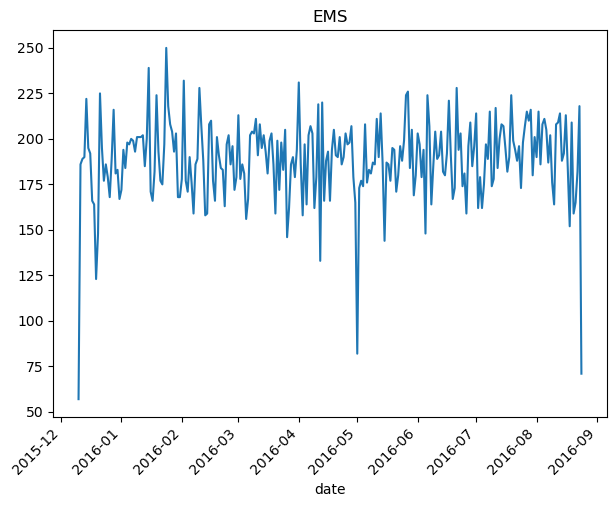

In [24]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')


In [25]:
# Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week
# To create heatmaps with seaborn and our data

day_hour = df.groupby(by=['dayofweek','hour']).count()['reason'].unstack()
day_hour.head()


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<Axes: xlabel='hour', ylabel='dayofweek'>

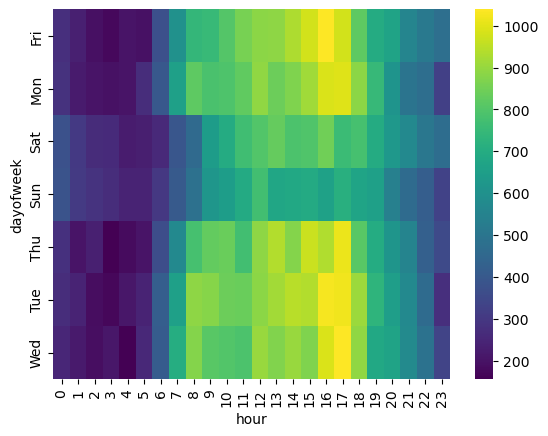

In [26]:
# HeatMap using this new DataFrame

sns.heatmap(day_hour, cmap='viridis')


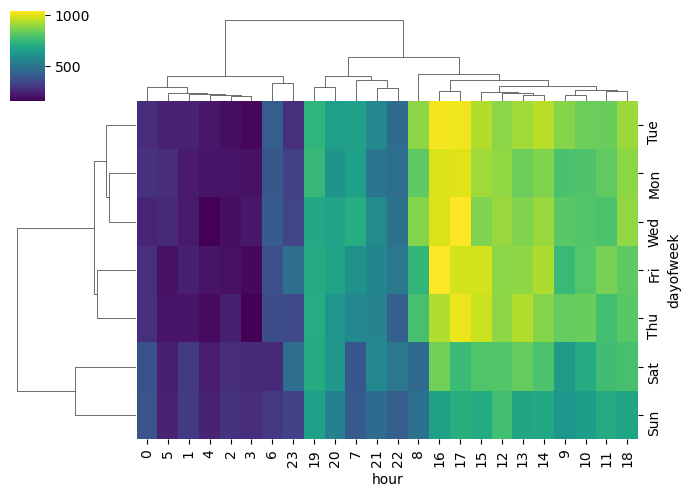

In [27]:
# Clustermap using this DataFrame

sns.clustermap(day_hour,cmap='viridis', figsize=(7,5))


In [28]:
# Repeating these same plots and operations for a DataFrame that shows the Month as the column.

day_month = df.groupby(by=['dayofweek','month']).count()['reason'].unstack()
day_month.head()


month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='month', ylabel='dayofweek'>

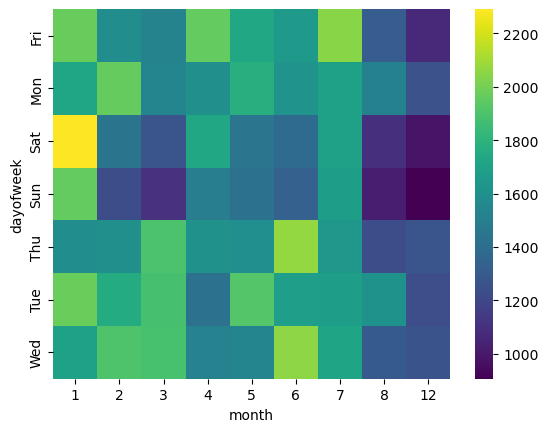

In [29]:
# Heatmap

sns.heatmap(day_month, cmap='viridis')

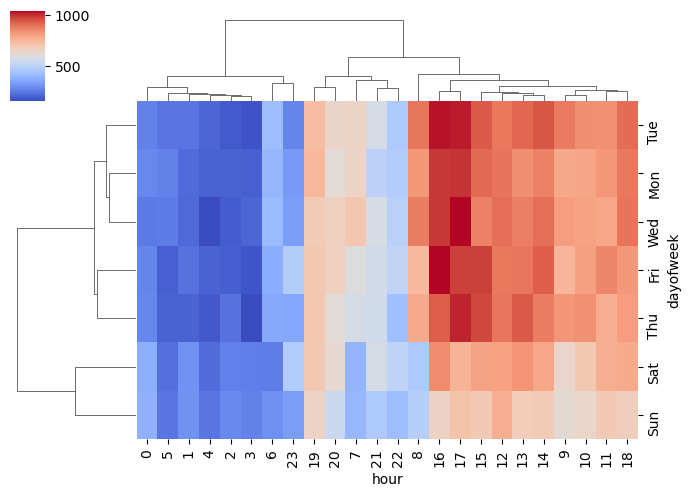

In [30]:
# ClusterMap

sns.clustermap(day_hour, cmap='coolwarm', figsize=(7,5))